In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)


df['job_skills'] = df['job_skills'].apply(clean_li)

In [ ]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_da['job_posted_month'] = df_da['job_posted_date'].dt.month

df_da
df_explode = df_da.explode('job_skills')

df_pivot = df_explode.pivot_table(index='job_posted_month', columns='job_skills',aggfunc='size', fill_value=0)

df_pivot.plot(kind ='line')

df_pivot.loc['total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]

df_pivot =df_pivot.drop('total')
df_pivot

df_pivot.iloc[:, :5].plot(kind='line')
plt.title('skills are for data analyat')
plt.ylabel('count')
plt.show()


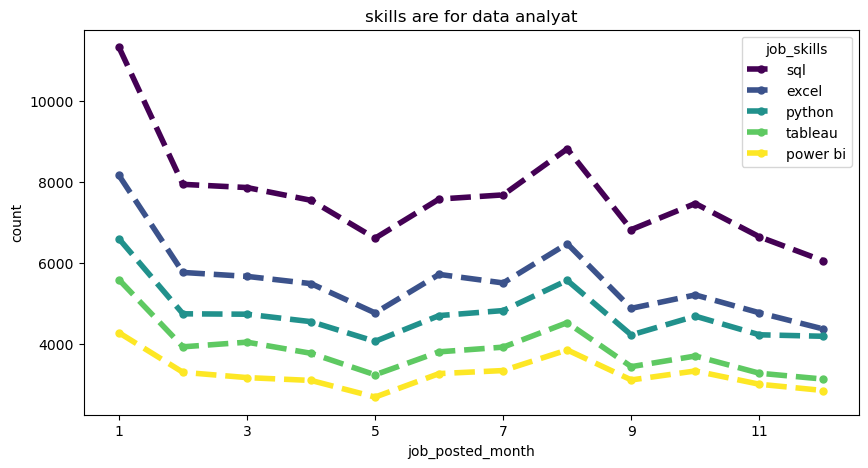

In [6]:
df_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='--',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
    )
plt.title('skills are for data analyat')
plt.ylabel('count')
plt.show()

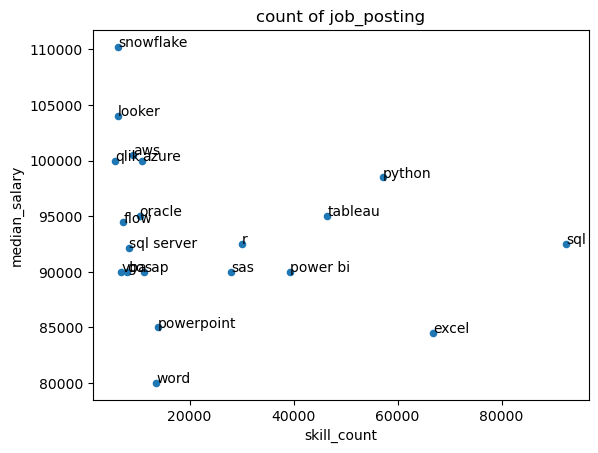

In [7]:
df_exploded = df_da.explode(['job_skills'])


skill_stat = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_stat

skill_stat  = skill_stat.sort_values(by='skill_count',ascending=False).head(20)

skill_stat.plot(kind='scatter',x='skill_count',y='median_salary')

plt.title('count of job_posting')
# # plt.xlabel('job_posting_count')
# # plt.ylabel('')
# # plt.legend().set_visible(False)

for i, txt in enumerate(skill_stat.index):
     plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt)    
plt.show()


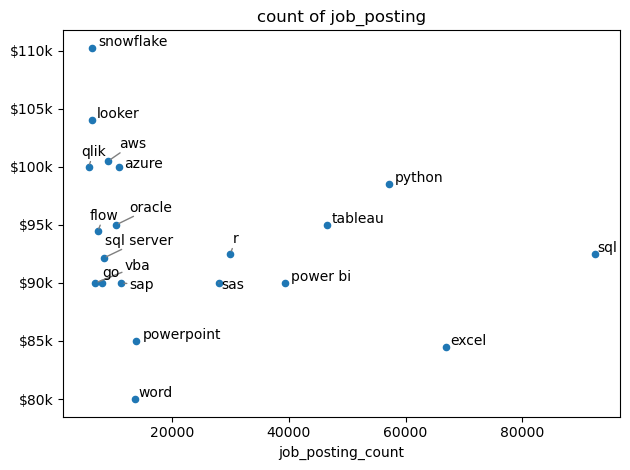

In [30]:
#fig, ax = plt.subplots()
from matplotlib.ticker import FuncFormatter

from adjustText import adjust_text
skill_stat.plot(kind='scatter',x='skill_count',y='median_salary')


texts = [] 

for i, txt in enumerate(skill_stat.index):
     texts.append(plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt))   
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='grey', lw=1))
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))


plt.title('count of job_posting') 
plt.xlabel('job_posting_count')
plt.ylabel('')
plt.tight_layout()
plt.show()